In [35]:
!unzip  Spectromorph_Assignment_1-20250619T084304Z-1-001.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [38]:
train_generator = train_datagen.flow_from_directory(
    '/content/Spectromorph_Assignment_1/dataset', target_size=(128, 128), batch_size=16,
    class_mode='categorical', subset='training'
)

val_generator = val_datagen.flow_from_directory(
    '/content/Spectromorph_Assignment_1/dataset', target_size=(128, 128), batch_size=16,
    class_mode='categorical', subset='validation'
)

Found 432 images belonging to 18 classes.
Found 108 images belonging to 18 classes.


In [ ]:
def create_model():
    model = models.Sequential([
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.GlobalMaxPooling2D(),
        layers.Dropout(0.5),
        layers.Dense(18, activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.0507 - loss: 3.8499 - val_accuracy: 0.0556 - val_loss: 2.8905
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.0696 - loss: 2.9325 - val_accuracy: 0.0556 - val_loss: 2.8904
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.0873 - loss: 2.9059 - val_accuracy: 0.0648 - val_loss: 2.8903
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.0769 - loss: 2.8546 - val_accuracy: 0.0926 - val_loss: 2.8898
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.1017 - loss: 2.8086 - val_accuracy: 0.1481 - val_loss: 2.8853
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.1018 - loss: 2.7554 - val_accuracy: 0.1204 - val_loss: 2.8695
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.1684 - loss: 2.6244 - val_accuracy: 0.1296 - val_loss: 2.8519
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.2033 - loss: 2.5014 - val_accuracy: 0.

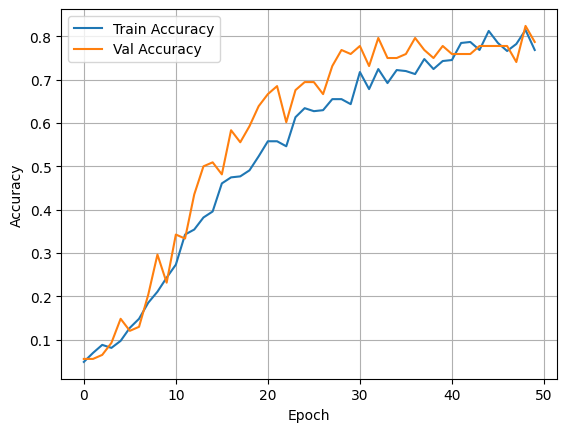

In [41]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()